In [ ]:
import os
from pathlib import Path

try:
    import google.colab

    IN_COLAB = True
except:
    IN_COLAB = False

if IN_COLAB:
    from google.colab import userdata

    repo_name = "dgcnz/dl2"
    url = f"https://{userdata.get('gh_path')}@github.com/{repo_name}.git"
    !git clone {url}
    print("\nCurrent Directory:")
    %cd dl2
    #!pip install torch torchvision numpy matplotlib git+https://github.com/AMLab-Amsterdam/lie_learn escnn scipy
    !pip install torchvision git+https://github.com/AMLab-Amsterdam/lie_learn escnn lightning wandb git+https://github.com/dgcnz/neuralyze git+https://github.com/QUVA-Lab/e2cnn
    !pip install -r requirements.txt


else:  # automatically checks if the current directory is 'repo name'
    curdir = Path.cwd()
    print("Current Directory", curdir)
    assert (
        curdir.name == "dl2" or curdir.parent.name == "dl2"
    ), "Notebook cwd has to be on the project root"
    if curdir.name == "notebooks":
        %cd ..

Cloning into 'dl2'...
remote: Enumerating objects: 2071, done.
remote: Counting objects: 100% (256/256), done.
remote: Compressing objects: 100% (134/134), done.
remote: Total 2071 (delta 172), reused 161 (delta 120), pack-reused 1815
Receiving objects: 100% (2071/2071), 62.32 MiB | 26.63 MiB/s, done.
Resolving deltas: 100% (1383/1383), done.
Updating files: 100% (217/217), done.

Current Directory:
/content/dl2
  Cloning https://github.com/AMLab-Amsterdam/lie_learn to /tmp/pip-req-build-klagnwj5
  Running command git clone --filter=blob:none --quiet https://github.com/AMLab-Amsterdam/lie_learn /tmp/pip-req-build-klagnwj5
  Resolved https://github.com/AMLab-Amsterdam/lie_learn to commit 1ccc2106e402d517a29de5438c9367c959e67338
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/dgcnz/neuralyze to /tmp/pip-req-build-gx1l1y6z
  Running

In [ ]:
!git pull

remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 13 (delta 11), reused 13 (delta 11), pack-reused 0
Unpacking objects: 100% (13/13), 1.43 KiB | 292.00 KiB/s, done.
From https://github.com/dgcnz/dl2
   a3430a2..cae0fd6  main       -> origin/main
Updating a3430a2..cae0fd6
Fast-forward
 src/compute_measures.py       | 10 +++++-----
 src/metrics/lie_derivative.py | 24 +++++++-----------------
 src/utils/lie_utils.py        | 14 +++++++++++++-
 3 files changed, 25 insertions(+), 23 deletions(-)


In [ ]:
import json
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
import pandas as pd

In [ ]:
import wandb
wandb.login(key=userdata.get('wandb_key'))

wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
#path_dict = {'best_alpha_0.01_equivariance_level_9': 'uva-dl2/wang2022/model-ciun18ho:v49'}

path_dict_epoch = {'epoch_3_alpha_inf_equivariance_level_0': 'uva-dl2/wang2022/model-umb37s34:v3',
                   'epoch_47_alpha_inf_equivariance_level_0': 'uva-dl2/wang2022/model-umb37s34:v47',
                   'epoch_3_alpha_0_equivariance_level_0': 'uva-dl2/wang2022/model-8bep9a0w:v3',
                   'epoch_50_alpha_0_equivariance_level_0': 'uva-dl2/wang2022/model-8bep9a0w:v50'}

path_dict_best = {'epoch_11_alpha_inf_equivariance_level_9': 'uva-dl2/wang2022/model-4gmxxq83:v43',
                  'epoch_16_alpha_inf_equivariance_level_5': 'uva-dl2/wang2022/model-3wuzf1rf:v48',
                  'epoch_28_alpha_inf_equivariance_level_0': 'uva-dl2/wang2022/model-umb37s34:v47',
                  'epoch_12_alpha_0_equivariance_level_9': 'uva-dl2/wang2022/model-lgxaqwzp:v12',
                  'epoch_50_alpha_0.1_equivariance_level_9': 'uva-dl2/wang2022/model-kr959h28:v50',
                  'epoch_50_alpha_1e-6_equivariance_level_9': 'uva-dl2/wang2022/model-slhpjzjv:v50',
                  'epoch_49_alpha_0_equivariance_level_5':  'uva-dl2/wang2022/model-dkdkoxoe:v49',
                  'epoch_50_alpha_0.1_equivariance_level_5': 'uva-dl2/wang2022/model-re1ys3x2:v50',
                  'epoch_50_alpha_1e-6_equivariance_level_5': 'uva-dl2/wang2022/model-vp1v9jqj:v50',
                  'epoch_50_alpha_0_equivariance_level_0': 'uva-dl2/wang2022/model-8bep9a0w:v50',
                  'epoch_50_alpha_0.1_equivariance_level_0': 'uva-dl2/wang2022/model-fyw9jx76:v50',
                  'epoch_50_alpha_1e-6_equivariance_level_0': 'uva-dl2/wang2022/model-vz626xf7:v50'}


test_rmse_dict = {'epoch_11_alpha_inf_equivariance_level_9': 0.6712,
                  'epoch_16_alpha_inf_equivariance_level_5': 0.5139,
                  'epoch_28_alpha_inf_equivariance_level_0': 0.1022,
                  'epoch_12_alpha_0_equivariance_level_9': 0.08028,
                  'epoch_50_alpha_0.1_equivariance_level_9': 0.1115,
                  'epoch_50_alpha_1e-6_equivariance_level_9': 0.08612,
                  'epoch_49_alpha_0_equivariance_level_5':  0.4223,
                  'epoch_50_alpha_0.1_equivariance_level_5': 0.4209,
                  'epoch_50_alpha_1e-6_equivariance_level_5': 0.4188,
                  'epoch_50_alpha_0_equivariance_level_0': 0.638,
                  'epoch_50_alpha_0.1_equivariance_level_0': 0.6274 ,
                  'epoch_50_alpha_1e-6_equivariance_level_0': 0.6353}

dummy_dict = {'epoch_28_alpha_inf_equivariance_level_0': 'uva-dl2/wang2022/model-umb37s34:v47',
               'epoch_50_alpha_0_equivariance_level_0': 'uva-dl2/wang2022/model-8bep9a0w:v50'}


In [ ]:
!python -m src.compute_measures --help

compute_measures is powered by Hydra.

== Configuration groups ==
Compose your configuration from those groups (group=option)

callbacks: default, early_stopping, early_stopping_rmse, model_checkpoint, model_summary, none, rich_progress_bar
data: mnist, rot_mnist
data/wang2022: equivariance_test, equivariance_test_better, rotation, scale, translation
debug: default, fdr, limit, overfit, profiler
experiment: baseline_exp_cnn, baseline_exp_gconv, example
experiment/wang2022/equivariance_encouraged: convnet, rgroup, rsteer
experiment/wang2022/equivariance_test: convnet, rgroup, rsteer
experiment/wang2022/rotation: convnet, rgroup, rsteer
experiment/wang2022/scale: convnet, rgroup, rsteer
experiment/wang2022/translation: convnet, rgroup, rsteer
extras: default
hparams_search: mnist_optuna
logger: aim, comet, csv, many_loggers, mlflow, neptune, tensorboard, wandb
model: 8c_equivariant_cnn, baseline_cnn, gcnn_classifier, mnist
model/wang2022: convnet, rgroup, rsteer
model/wang2022/equivarian

In [ ]:
!git pull

remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 5 (delta 4), reused 5 (delta 4), pack-reused 0
Unpacking objects: 100% (5/5), 421 bytes | 421.00 KiB/s, done.
From https://github.com/dgcnz/dl2
   cae0fd6..9370b9d  main       -> origin/main
Updating cae0fd6..9370b9d
Fast-forward
 src/metrics/lie_derivative.py | 2 +-
 1 file changed, 1 insertion(+), 1 deletion(-)


In [ ]:
!python -m src.compute_measures ++weight_decay=1e-5 percentage_data=20 'ckpt_path_dict={path_dict_best}' spectrum=True sharpness=True

wandb: Currently logged in as: nestam (organize). Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.17.0
wandb: Run data is saved locally in /content/dl2/wandb/run-20240525_164437-rku5vy5m
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run young-valley-145
wandb: ⭐️ View project at https://wandb.ai/organize/dl2
wandb: 🚀 View run at https://wandb.ai/organize/dl2/runs/rku5vy5m
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
[2024-05-25 16:45:01,029][__main__][INFO] - [rank: 0] obtaining spectrum for checkpoint
/usr/local/lib/python3.10/dist-packages/e2cnn/nn/m

In [ ]:
import torch
tensor = torch.tensor(5.)
print(tensor.shape)

torch.Size([])


In [ ]:
with open('logs/measures/metrics (2).json') as json_file:
    metric_dict = json.load(json_file)
print(metric_dict)

{'epoch_3_alpha_inf_equivariance_level_0': {'sharpness': 0.01149134710431099}, 'epoch_47_alpha_inf_equivariance_level_0': {'sharpness': 0.004054910968989134}, 'epoch_3_alpha_0_equivariance_level_0': {'sharpness': 2.5709596229717135e-06}, 'epoch_50_alpha_0_equivariance_level_0': {'sharpness': 1.821387769496141e-07}}


##Hessian Spectra

In [ ]:
def plot_fn(spectrums: list, names: list, epoch: int):
    fig, ax = plt.subplots()
    # Create kernel density estimate
    for spectrum, name in zip(spectrums, names):
        kde = gaussian_kde(spectrum)

        # Create x values for the plot
        x = np.linspace(min(spectrum), max(spectrum), 1000)

        # Compute the density estimate
        density = kde(x)

        # Plot density estimate as a line
        ax.plot(x, density, label=name)

    # Add labels and title
    ax.set_xlabel("Max Eigenvalue")
    ax.set_ylabel("Density")
    ax.set_title("Density plot of max eigenvalues at epoch " + str(epoch))
    ax.legend()
    plt.show()

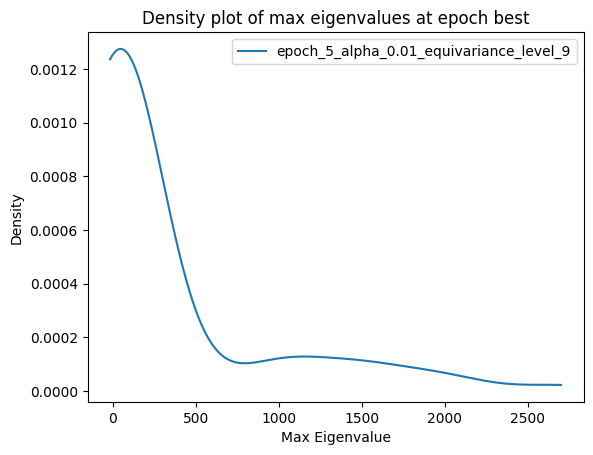

In [ ]:
names = [name for name in metric_dict.keys()]
spectrums = [values['spectrum'] for values in metric_dict.values()]
plot_fn(spectrums, names, 'best')

##Sharpeness


##Equivariance learned/error

In [ ]:
equivariance_dict = {'alpha': [], 'equivariance_level': [], 'error': [], 'lie': [], 'sharpness':[]}
data_equivariance_error_map = {0: 0.0,1: 0.17,2: 0.313,3: 0.435,4: 0.541,5: 0.63,6: 0.709,7: 0.78,
                               8:0.84, 9:0.896}
#epoch_11_alpha_inf_equivariance_level_9

for key, value in metric_dict.items():
    error = value['equivariance_error']
    lie = value['lie_derivative']
    sharpness = value['sharpness']

    parts = key.split('_')
    alpha = parts[3]
    alpha = float(alpha)
    level = parts[-1]
    equivariance_dict['alpha'].append(alpha)
    equivariance_dict['equivariance_level'].append(int(level))
    equivariance_dict['error'].append(error)
    equivariance_dict['lie'].append(lie)
    equivariance_dict['sharpness'].append(sharpness)

df = pd.DataFrame(equivariance_dict)

print(df)

       alpha  equivariance_level         error         lie  sharpness
0        inf                   9  4.681449e-07  355.051270   0.351833
1        inf                   5  4.405076e-07  271.674042   0.169687
2        inf                   0  2.191631e-07  112.069489   0.090817
3   0.000000                   9  1.036592e-01  481.145447  16.787519
4   0.100000                   9  9.994531e-02  459.561646  21.703035
5   0.000001                   9  9.907729e-02  473.757324  23.270842
6   0.000000                   5  6.446808e-02  268.269806  22.472837
7   0.100000                   5  6.438524e-02  281.172211  19.405302
8   0.000001                   5  6.778483e-02  290.739136  23.600317
9   0.000000                   0  5.538779e-03   78.402122  16.859104
10  0.100000                   0  7.489807e-03   73.771858  19.224073
11  0.000001                   0  5.080650e-03   77.240936  21.772614


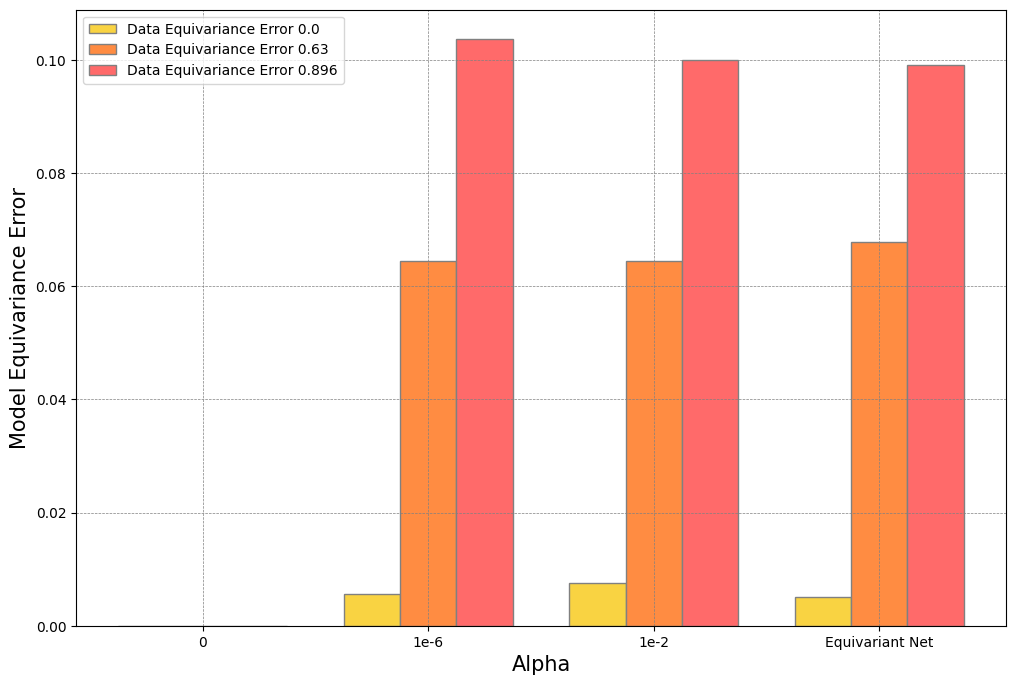

In [ ]:
##Error

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

# set height of bar
level_0 = df[df['equivariance_level'] == 0]['error']
level_5 = df[df['equivariance_level'] == 5]['error']
level_9 = df[df['equivariance_level'] == 9]['error']

# Set position of bar on X axis
br1 = np.arange(len(level_0))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Create bars with adjusted colors
plt.bar(br1, level_0, color='#F9D342', width=barWidth, edgecolor='grey', label='Data Equivariance Error ' + str(data_equivariance_error_map[0]))
plt.bar(br2, level_5, color='#FF8C42', width=barWidth, edgecolor='grey', label='Data Equivariance Error ' + str(data_equivariance_error_map[5]))
plt.bar(br3, level_9, color='#FF6A6A', width=barWidth, edgecolor='grey', label='Data Equivariance Error ' + str(data_equivariance_error_map[9]))

# Adding Xticks
plt.xlabel('Alpha', fontsize=15)
plt.ylabel('Model Equivariance Error', fontsize=15)
plt.xticks([r + barWidth for r in range(len(level_0))], ['0', '1e-6', '1e-2', 'Equivariant Net'])

# Adding grid
plt.grid(True, which='major', linestyle='--', linewidth='0.5', color='grey')

# Add legend
plt.legend()

# Display the plot
plt.show()

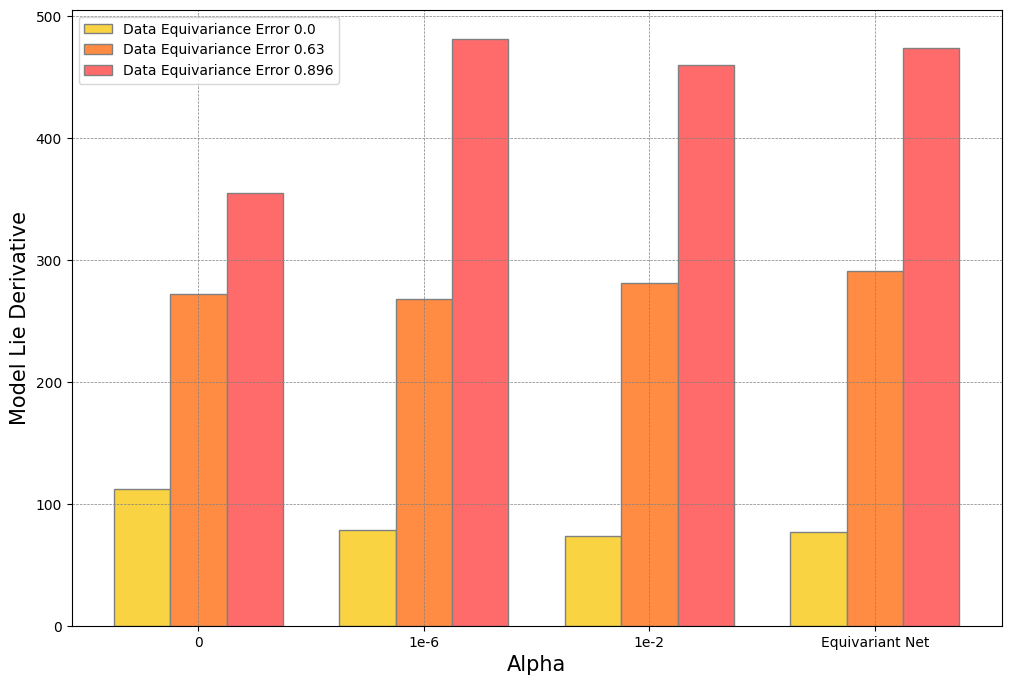

In [ ]:
#Lie

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

# set height of bar
level_0 = df[df['equivariance_level'] == 0]['lie']
level_5 = df[df['equivariance_level'] == 5]['lie']
level_9 = df[df['equivariance_level'] == 9]['lie']

# Set position of bar on X axis
br1 = np.arange(len(level_0))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Create bars with adjusted colors
plt.bar(br1, level_0, color='#F9D342', width=barWidth, edgecolor='grey', label='Data Equivariance Error ' + str(data_equivariance_error_map[0]))
plt.bar(br2, level_5, color='#FF8C42', width=barWidth, edgecolor='grey', label='Data Equivariance Error ' + str(data_equivariance_error_map[5]))
plt.bar(br3, level_9, color='#FF6A6A', width=barWidth, edgecolor='grey', label='Data Equivariance Error ' + str(data_equivariance_error_map[9]))

# Adding Xticks
plt.xlabel('Alpha', fontsize=15)
plt.ylabel('Model Lie Derivative', fontsize=15)
plt.xticks([r + barWidth for r in range(len(level_0))], ['0', '1e-6', '1e-2', 'Equivariant Net'])

# Adding grid
plt.grid(True, which='major', linestyle='--', linewidth='0.5', color='grey')

# Add legend
plt.legend()

# Display the plot
plt.show()

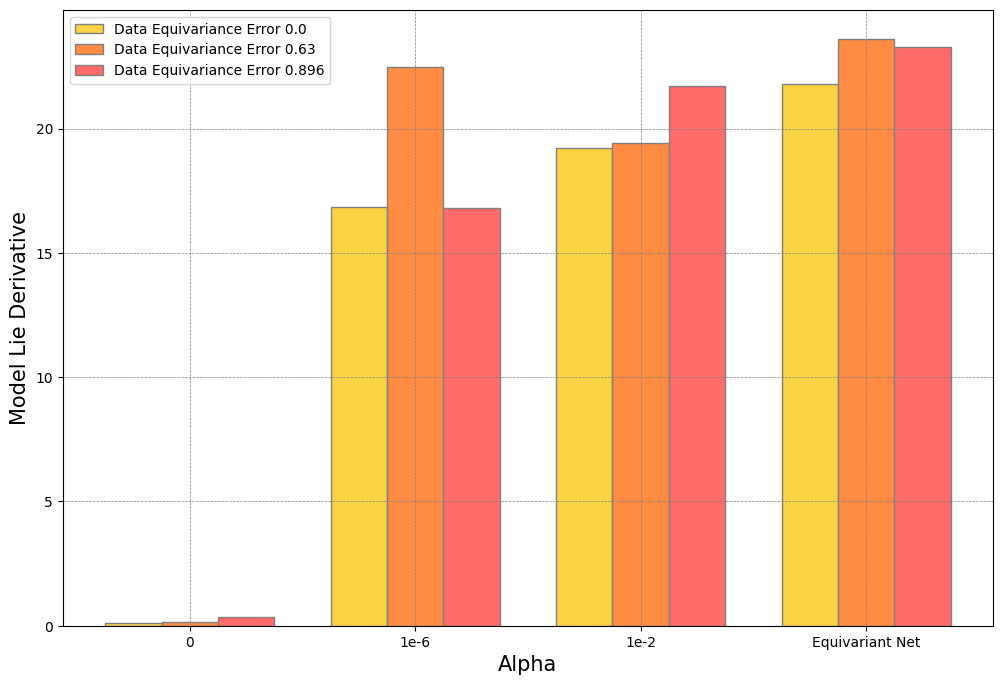

In [ ]:
#Lie

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))


# set height of bar
level_0 = df[df['equivariance_level'] == 0]['sharpness']
level_5 = df[df['equivariance_level'] == 5]['sharpness']
level_9 = df[df['equivariance_level'] == 9]['sharpness']

# Set position of bar on X axis
br1 = np.arange(len(level_0))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Create bars with adjusted colors
plt.bar(br1, level_0, color='#F9D342', width=barWidth, edgecolor='grey', label='Data Equivariance Error ' + str(data_equivariance_error_map[0]))
plt.bar(br2, level_5, color='#FF8C42', width=barWidth, edgecolor='grey', label='Data Equivariance Error ' + str(data_equivariance_error_map[5]))
plt.bar(br3, level_9, color='#FF6A6A', width=barWidth, edgecolor='grey', label='Data Equivariance Error ' + str(data_equivariance_error_map[9]))

# Adding Xticks
plt.xlabel('Alpha', fontsize=15)
plt.ylabel('Model Lie Derivative', fontsize=15)
plt.xticks([r + barWidth for r in range(len(level_0))], ['0', '1e-6', '1e-2', 'Equivariant Net'])

# Adding grid
plt.grid(True, which='major', linestyle='--', linewidth='0.5', color='grey')

# Add legend
plt.legend()

# Display the plot
plt.show()

  epoch     sharpness alpha
0     3  1.149135e-02   inf
2     3  2.570960e-06     0
1    47  4.054911e-03   inf
3    50  1.821388e-07     0
hello


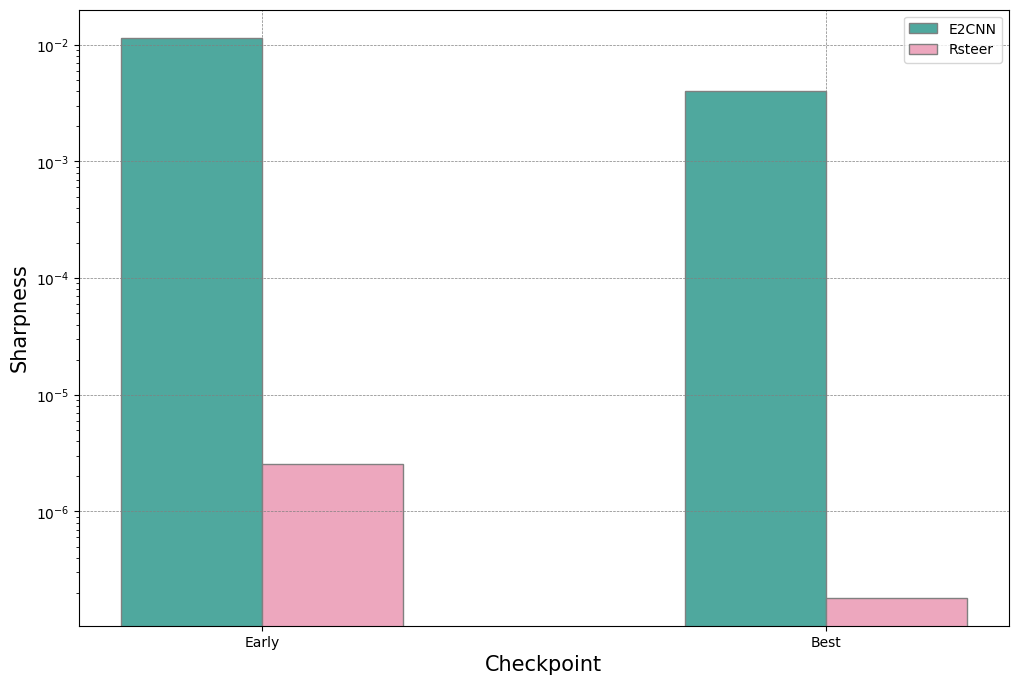

In [ ]:
#Lie
equivariance_dict = {'epoch': [], 'sharpness':[], 'alpha':[]}

#epoch_11_alpha_inf_equivariance_level_9

for key, value in metric_dict.items():
    sharpness = value['sharpness']


    parts = key.split('_')
    epoch = parts[1]
    alpha = parts[3]

    equivariance_dict['epoch'].append(epoch)
    equivariance_dict['sharpness'].append(sharpness)
    equivariance_dict['alpha'].append(alpha)

# set width of bar
df = pd.DataFrame(equivariance_dict)
df = df.sort_values(by='epoch')

print(df)
print('hello')

barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

# set height of bar
E2 = df[df['alpha'] == 'inf']['sharpness']
Rsteer = df[df['alpha'] == '0']['sharpness']


# Set position of bar on X axis
br1 = np.arange(len(E2))
br2 = [x + barWidth for x in br1]

# Create bars with adjusted colors
plt.bar(br1, E2, color='#4fa89e', width=barWidth, edgecolor='grey', label='E2CNN')
plt.bar(br2, Rsteer, color='#eda7be', width=barWidth, edgecolor='grey', label='Rsteer')

# Adding Xticks
plt.xlabel('Checkpoint', fontsize=15)
plt.ylabel('Sharpness', fontsize=15)
plt.xticks([r + barWidth / 2 for r in range(len(E2))], ['Early', 'Best'])
plt.yscale('log')
# Adding grid
plt.grid(True, which='major', linestyle='--', linewidth='0.5', color='grey')

# Add legend
plt.legend()

# Display the plot
plt.show()

###RMSE###


{'epoch_11_alpha_inf_equivariance_level_9': 0.6712, 'epoch_16_alpha_inf_equivariance_level_5': 0.5139, 'epoch_28_alpha_inf_equivariance_level_0': 0.1022, 'epoch_12_alpha_0_equivariance_level_9': 0.08028, 'epoch_50_alpha_0.1_equivariance_level_9': 0.1115, 'epoch_50_alpha_1e-6_equivariance_level_9': 0.08612, 'epoch_49_alpha_0_equivariance_level_5': 0.4223, 'epoch_50_alpha_0.1_equivariance_level_5': 0.4209, 'epoch_50_alpha_1e-6_equivariance_level_5': 0.4188, 'epoch_50_alpha_0_equivariance_level_0': 0.638, 'epoch_50_alpha_0.1_equivariance_level_0': 0.6274, 'epoch_50_alpha_1e-6_equivariance_level_0': 0.6353}
       alpha  equivariance_level    value
3   0.000000               0.896  0.08028
6   0.000000               0.630  0.42230
9   0.000000               0.000  0.63800
5   0.000001               0.896  0.08612
8   0.000001               0.630  0.41880
11  0.000001               0.000  0.63530
4   0.100000               0.896  0.11150
7   0.100000               0.630  0.42090
10  0.10000

KeyError: 'rmse'

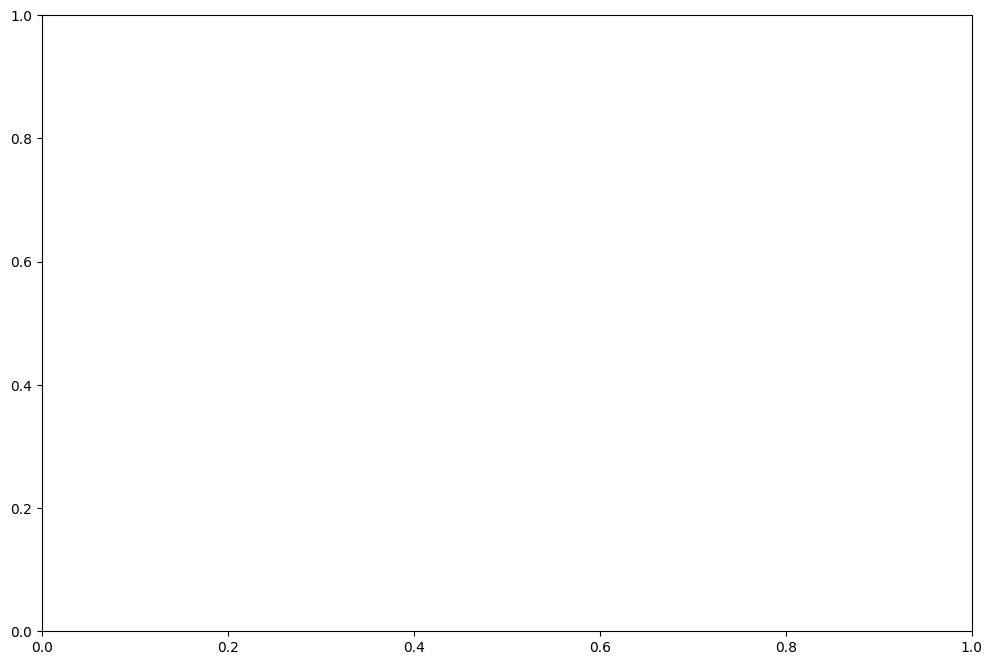

In [ ]:
df_dict = {'alpha': [], 'equivariance_level': [], 'value': []}
data_equivariance_error_map = {0: 0.0,1: 0.17,2: 0.313,3: 0.435,4: 0.541,5: 0.63,6: 0.709,7: 0.78,
                               8:0.84, 9:0.896}
#epoch_11_alpha_inf_equivariance_level_9
print(test_rmse_dict)

for key, value in test_rmse_dict.items():
    parts = key.split('_')
    alpha = parts[3]
    alpha = float(alpha)
    level = parts[-1]
    df_dict['alpha'].append(alpha)
    df_dict['equivariance_level'].append(
        data_equivariance_error_map[int(level)])
    df_dict['value'].append(value)

# Creating the DataFrame
df = pd.DataFrame(df_dict)

# Converting alpha and equivariance_level to numeric types for plotting
df['alpha'] = pd.to_numeric(df['alpha'])
df['equivariance_level'] = pd.to_numeric(df['equivariance_level'])

# Sorting the DataFrame by the alpha column
df = df.sort_values(by='alpha')

print(df)

#################### MAKE the bar plot #####################
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

# set height of bar
#IT = [12, 30, 1, 8, 22]
level_0 = df[df['equivariance_level'] == data_equivariance_error_map[0]]['rmse']


# Set position of bar on X axis
br1 = np.arange(len(level_0))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, level_0, color ='r', width = barWidth,
        edgecolor ='grey', label ='IT')
#plt.bar(br2, ECE, color ='g', width = barWidth,
#       edgecolor ='grey', label ='ECE')
#lt.bar(br3, CSE, color ='b', width = barWidth,
#        edgecolor ='grey', label ='CSE')

# Adding Xticks
plt.xlabel('Branch', fontweight ='bold', fontsize = 15)
plt.ylabel('Students passed', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(level_0))],
        ['0', '0.1', '0.000001'])

plt.legend()
plt.show()







<ipython-input-23-069caa9910e7>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='value', y='alpha', inner='stick', palette='Dark2')


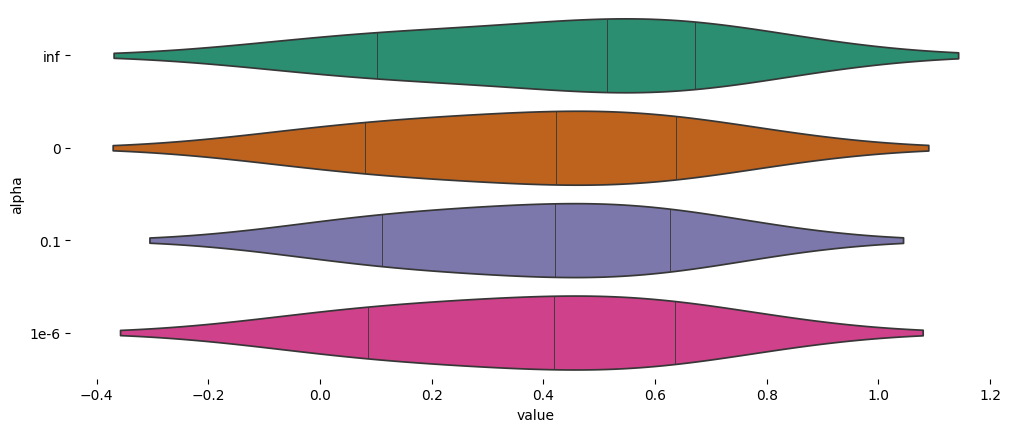

In [ ]:
# @title alpha vs value

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['alpha'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='value', y='alpha', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)